In [ ]:
!pip install arviz==0.6.1
!pip install pymc3==3.8
!pip install Theano==1.0.4

     |████████████████████████████████| 1.4MB 5.5MB/s 
     |████████████████████████████████| 4.3MB 47.4MB/s 
     |████████████████████████████████| 296kB 48.7MB/s 
     |████████████████████████████████| 911kB 5.3MB/s 
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7
     |████████████████████████████████| 2.8MB 5.7MB/s 
  Created wheel for Theano: filename=Theano-1.0.4-cp36-none-any.whl size=2667178 sha256=a59bd5af685bbf5d8c588ab5ac20589f19940766255267ce094db9420d16d4e9
  Stored in directory: /root/.cache/pip/wheels/88/fb/be/483910ff7e9f703f30a10605ad7605f3316493875c86637014
Successfully built Theano
  Found existing installation: Theano 1.0.5
    Uninstalling Theano-1.0.5:
      Successfully uninstalled Theano-1.0.5


In [ ]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['retina']
plt.rc('font', size=12)
plt.style.use('seaborn-darkgrid')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [mu, stdev]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:01<00:00, 1283.36it/s]
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/

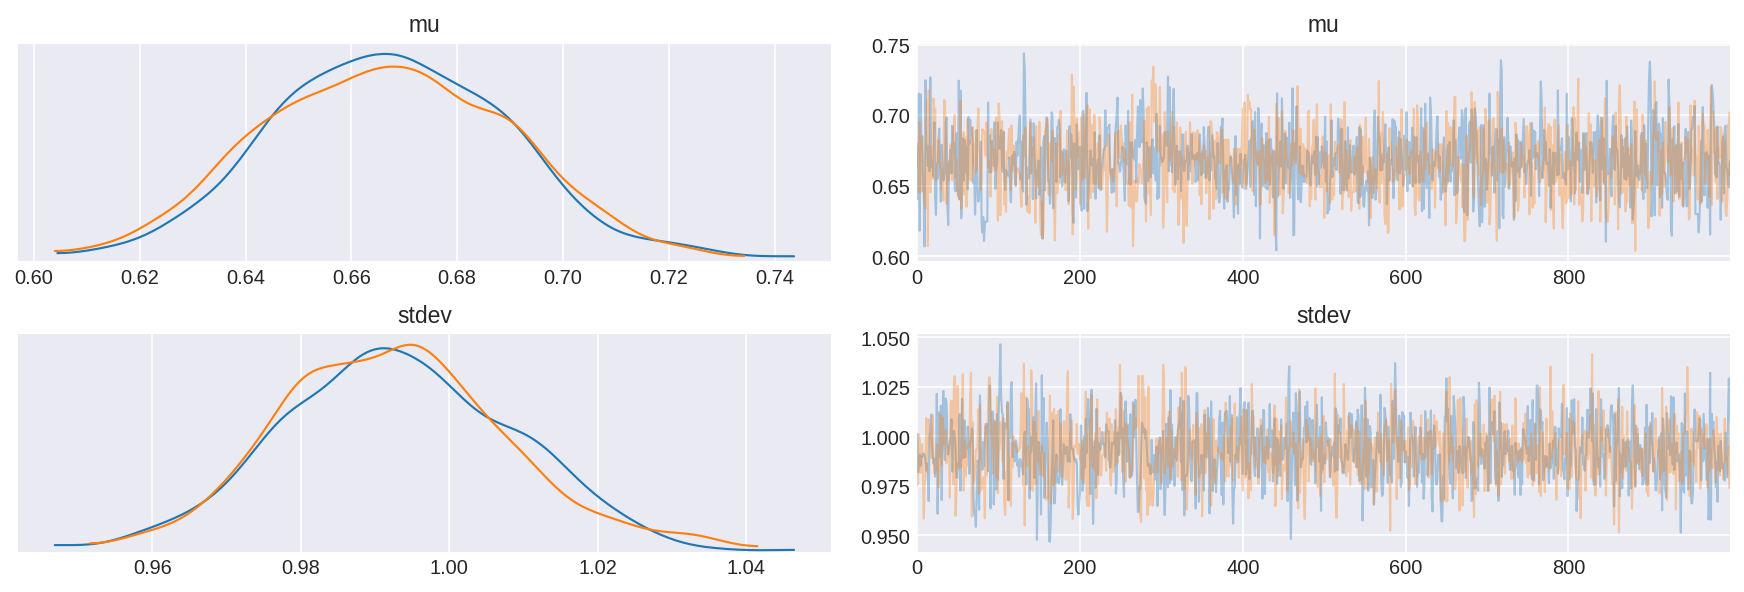

In [ ]:
# 1. generate the artificial dataset. The distribution is mu=0.7, sd=1
obs_y = np.random.normal(0.7, 1, 2000)
# Model data with simple bayesian model.
with pm.Model() as exercise1:
#priors
    stdev = pm.HalfNormal('stdev', sd=1.75)
    mu = pm.Normal('mu', mu=0.0, sd=1.75)

#likelihood
    y = pm.Normal('y', mu=mu, sd=stdev, observed=obs_y)

    trace = pm.sample(1000)   # draw 1000 samples, of most likely values of mu and sd which will not be point values but distributions
    # trace is a dictionary for each random variable in the mode, in this case the mu and the sd, each having 500 draws
    # the postrior distribution is what the modl believes these parameters will be AFTER having looked at the DATA 'obs_y' in this case.

    pm.traceplot((trace),['mu','stdev'])
   
    plt.show()

In [ ]:
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,0.667,0.023,0.624,0.708,0.001,0.0,1773.0,1772.0,1771.0,993.0,1.0
stdev,0.993,0.015,0.965,1.023,0.000,0.0,1804.0,1804.0,1794.0,1522.0,1.0


These graphs show the beliefs of the models about the valuees of mu and sd.the expectation of the mu ( peak) is around 0.7 and sd is around 1.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [mu, stdev]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:01<00:00, 1082.59it/s]
The acceptance probability does not match the target. It is 0.8924497274536438, but should be close to 0.8. Try to increase the number of tuning steps.
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument ba

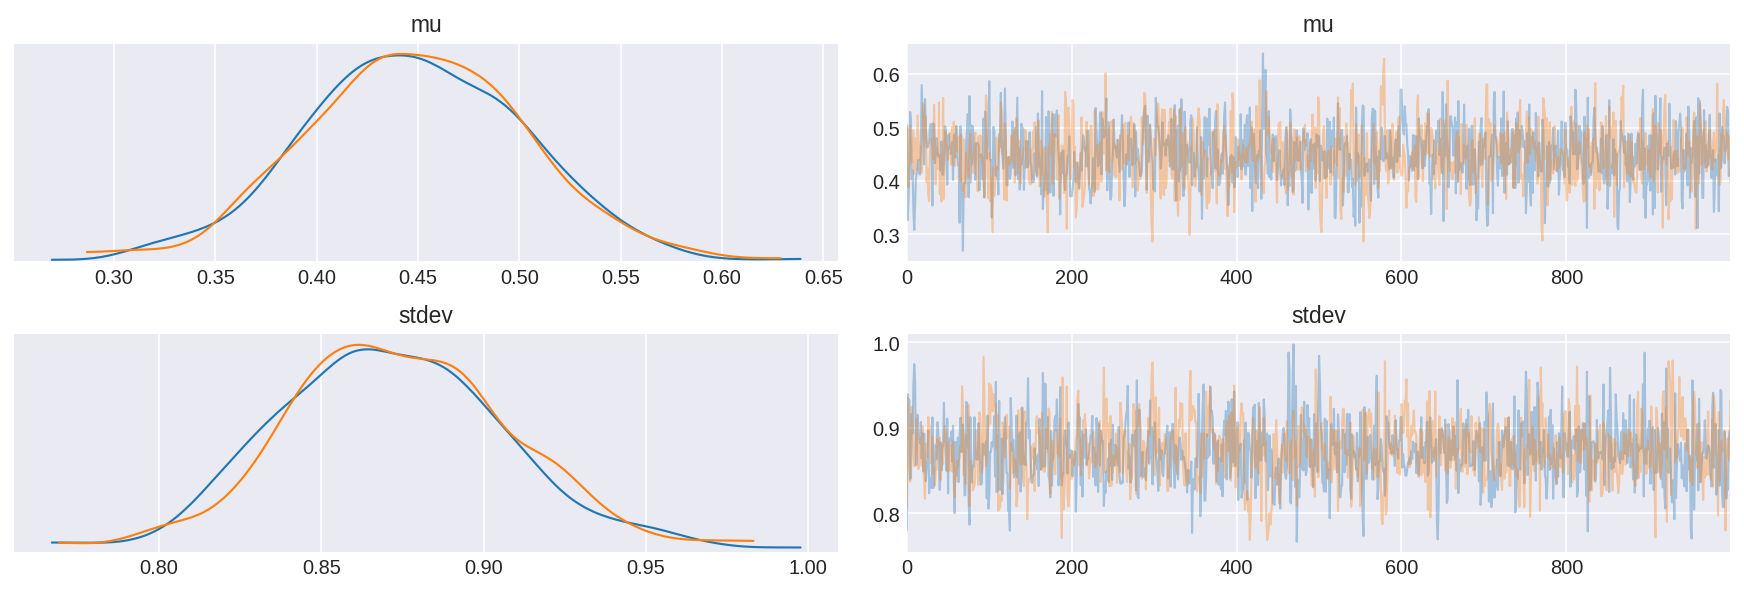

In [ ]:
obs_y = np.random.normal(0.7, 1, 200)  # notice that we now have ONLY 200 data points in obs_y

with pm.Model() as exercise1:  # restricted PRIORs

    stdev = pm.HalfNormal('stdev', sd=0.1)  # notice that the sd is 0.1
    mu = pm.Normal('mu', mu=0.0, sd=0.1)  #  notice the sd is not 1 but is 0.1

    y = pm.Normal('y', mu=mu, sd=stdev, observed=obs_y)

    trace = pm.sample(1000)   # draw 1000 samples, of most likely values of mu and sd which will not be point values but distributions
    # trace is a dictionary for each random variable in the mode, in this case the mu and the sd, each having 1000 draws
    # the postrior distribution is what the modl believes these parameters will be AFTER having looked at the DATA 'obs_y' in this case.

    pm.traceplot((trace),['mu','stdev'])
    plt.show()

In [ ]:
  pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,0.449,0.053,0.348,0.545,0.001,0.001,1521.0,1521.0,1522.0,1401.0,1.0
stdev,0.873,0.036,0.807,0.942,0.001,0.001,1082.0,1081.0,1091.0,922.0,1.0


Note that the trace plot on th left of mu shows the peak at around 0.45 and the peak for sd is seen around 0.87.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [mu, stdev]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:02<00:00, 716.84it/s]
The acceptance probability does not match the target. It is 0.8914075863337755, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9251866829976837, but should be close to 0.8. Try to increase the number of tuning steps.
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs 

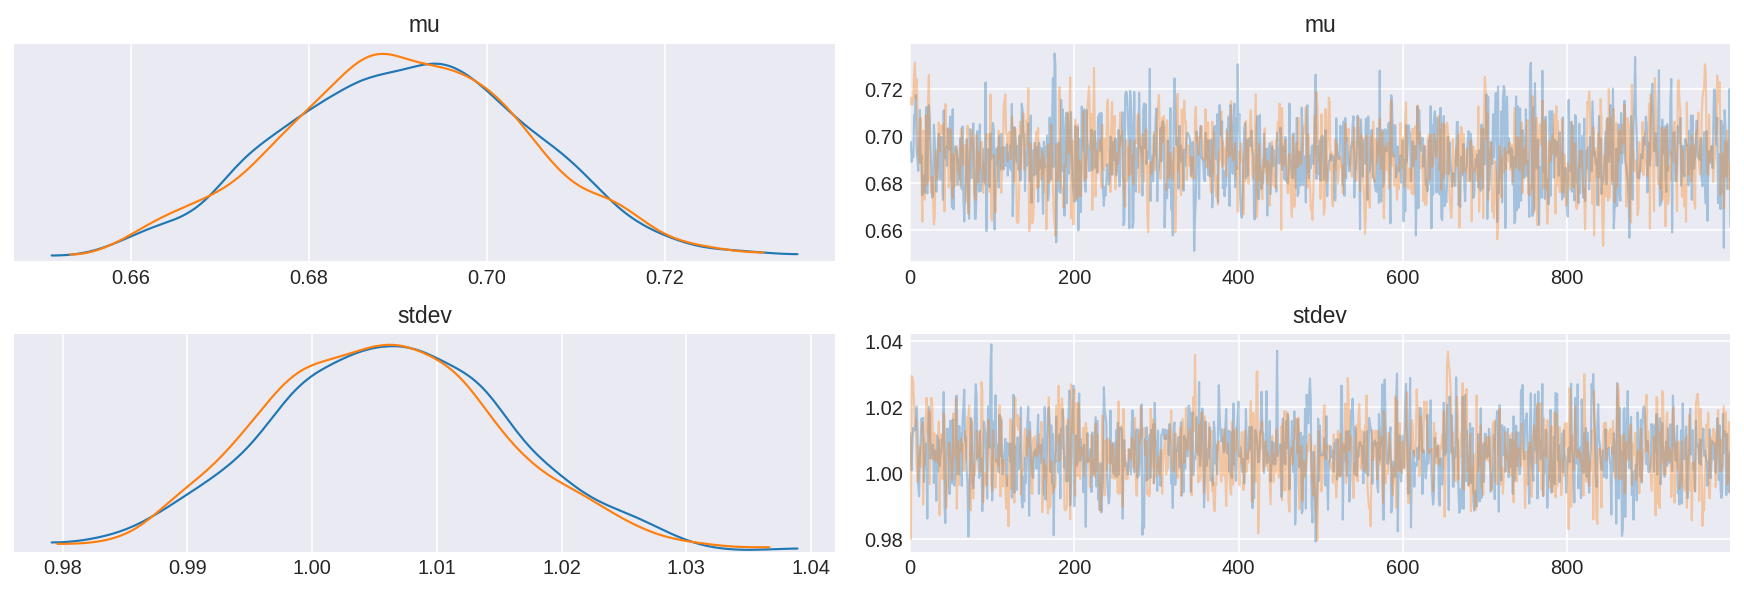

In [ ]:
# 1. generate the artificial dataset. The distribution is mu=0.7, sd=1
obs_y = np.random.normal(0.7, 1,5000) #Increased number of points to 5000.
# 2. model that data with a simple Bayesian model.
with pm.Model() as exercise1:

    stdev = pm.HalfNormal('stdev', sd=0.1)
    mu = pm.Normal('mu', mu=0.0, sd=0.1)

    y = pm.Normal('y', mu=mu, sd=stdev, observed=obs_y)

    trace = pm.sample(1000)   # draw 1000 samples, of most likely values of mu and sd which will not be point values but distributions
    # trace is a dictionary for each random variable in the mode, in this case the mu and the sd, each having 1000 draws
    # the postrior distribution is what the modl believes these parameters will be AFTER having looked at the DATA 'obs_y' in this case.

    pm.traceplot((trace),['mu','stdev'])
    plt.show()

In [ ]:
  pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,0.691,0.014,0.663,0.715,0.0,0.0,1479.0,1469.0,1482.0,1010.0,1.0
stdev,1.006,0.010,0.989,1.024,0.0,0.0,1571.0,1570.0,1568.0,1285.0,1.0


the estimated mean is around 0.7 ( expectted value) and the stimated sd is around 1 even if the priors were restricted. This happpend because the DATA pointd it out.